## Описание задачи

Вам нужно исследовать данные о прохождении игроками уровней match3-игры и
выполнить следующие задания:

***Задание 1***

Предложить метрику, описывающую сложность уровней, и рассчитать ее.

***Задание 2***

По результатам предыдущего задания разделить уровни на группы по сложности и
сделать вывод о плотности расположения сложных уровней в игре.

***Задание 3***

Рассчитать "воронку" прохождения уровней новым пользователем после установки
игры.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

Предобработка данных

In [3]:
data = pd.read_csv('plr_smpl_attempts.csv', sep=';')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22231214 entries, 0 to 22231213
Data columns (total 4 columns):
uid           object
action        object
level         int64
event_time    int64
dtypes: int64(2), object(2)
memory usage: 678.4+ MB


In [4]:
data.head()

,uid,action,level,event_time
0,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640
1,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640
2,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640
3,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640
4,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640


Проверим на дубликаты, пропуски

In [5]:
data.duplicated().value_counts()

True     11843502
False    10387712
dtype: int64

Больше половины датасета дублирующие строки, но думаю это из-за недостатка столбцов в тестовых данных, поэтому удалять дубликаты не буду.

In [6]:
data.shape

(22231214, 4)

In [7]:
data.dropna(inplace=True)

In [8]:
data.shape

(22231214, 4)

Пропусков в данных нет

In [4]:
#заменяем значения в столбце action 1 - completed, 0 - failed
data['action'] = data['action'].map({'completed':1, 'failed':0})

***Задание 1***

Предложить метрику, описывающую сложность уровней, и рассчитать ее.

Для оценки сложности уровней, я предлагаю использовать метрику failrate которая расчитывается как 

количество поражений/(количество поражений + количество побед)

In [5]:
#количество действий(количество поражений и побед) для каждого уровня
data_action = pd.DataFrame(data.groupby('level', as_index=True).count()['action'])
data_action['level'] = data_action.index

In [6]:
#количество побед для каждого уровня
data_action['completed'] = pd.DataFrame(data.groupby('level').sum()['action'])

In [7]:
#расчитаем failrate
data_action['fail_rate'] = data_action['completed']/data_action['action']

***Задание 2***

По результатам предыдущего задания разделить уровни на группы по сложности и
сделать вывод о плотности расположения сложных уровней в игре.


In [8]:
def colors_from_values(values, palette_name):
    """
    Выбирает яркость цвета в зависимости от значения
    """
    normalized = (values - min(values)) / (max(values) - min(values))
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

Text(0.5, 1.0, 'Кривая сложности уровни 0-50')

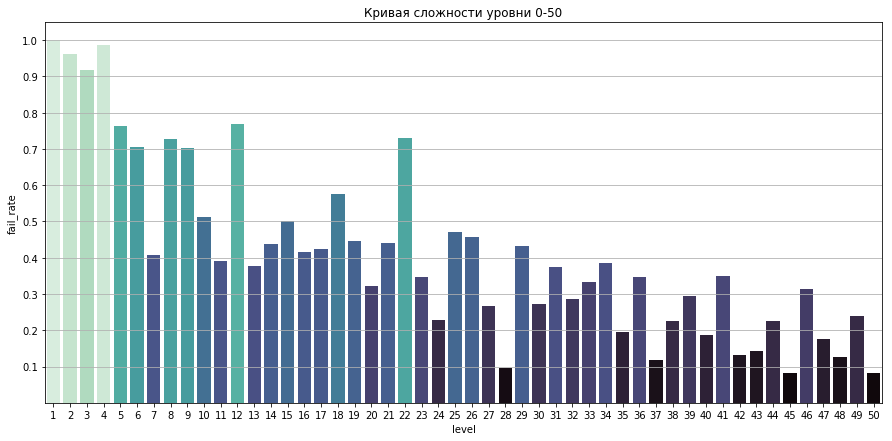

In [32]:
x = data_action[(data_action['level'] > 0) & (data_action['level'] <= 50)].level
y = data_action[(data_action['level'] > 0) & (data_action['level'] <= 50)].fail_rate
sns.barplot(x, y, palette=colors_from_values(y, "mako"))
plt.rcParams['figure.figsize']=[15,7]
plt.grid(axis='y')
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.title('Кривая сложности уровни 0-50')

Text(0.5, 1.0, 'Кривая сложности уровни 50-100')

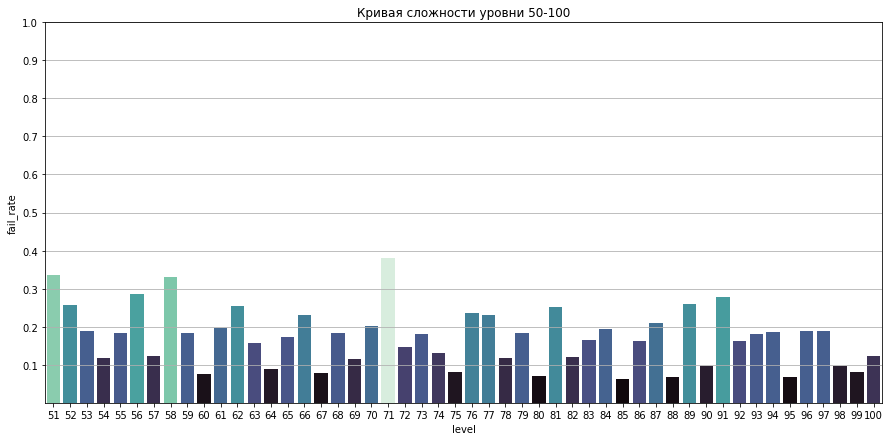

In [15]:
x = data_action[(data_action['level'] > 50) & (data_action['level'] <= 100)].level
y = data_action[(data_action['level'] > 50) & (data_action['level'] <= 100)].fail_rate
sns.barplot(x, y, palette=colors_from_values(y, "mako"))
plt.rcParams['figure.figsize']=[15,7]
plt.grid(axis='y')
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.title('Кривая сложности уровни 50-100')

Text(0.5, 1.0, 'Кривая сложности уровни 100-150')

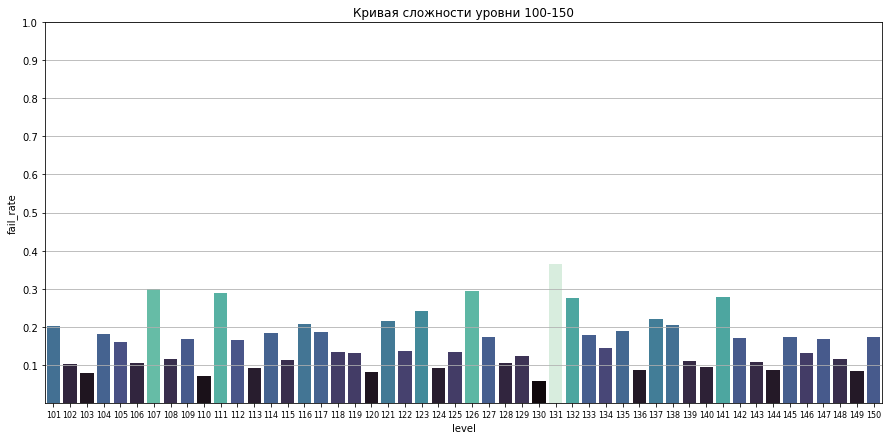

In [15]:
x = data_action[(data_action['level'] > 100) & (data_action['level'] <= 150)].level
y = data_action[(data_action['level'] > 100) & (data_action['level'] <= 150)].fail_rate
sns.barplot(x, y, palette=colors_from_values(y, "mako"))
plt.rcParams['figure.figsize']=[15,7]
plt.grid(axis='y')
plt.tick_params(axis='x', labelsize=8)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.title('Кривая сложности уровни 100-150')

Text(0.5, 1.0, 'Кривая сложности уровни 150-200')

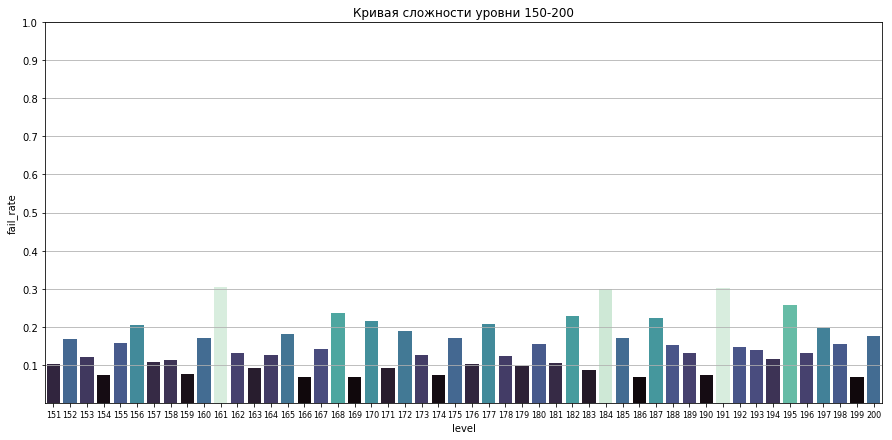

In [16]:
x = data_action[(data_action['level'] > 150) & (data_action['level'] <= 200)].level
y = data_action[(data_action['level'] > 150) & (data_action['level'] <= 200)].fail_rate
sns.barplot(x, y, palette=colors_from_values(y, "mako"))
plt.rcParams['figure.figsize']=[15,7]
plt.grid(axis='y')
plt.tick_params(axis='x', labelsize=8)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.title('Кривая сложности уровни 150-200')

Text(0.5, 1.0, 'Кривая сложности уровни 200-250')

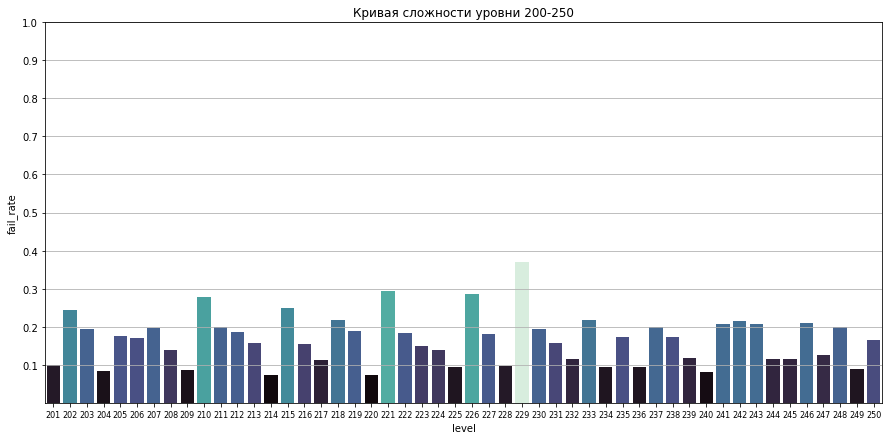

In [17]:
x = data_action[(data_action['level'] > 200) & (data_action['level'] <= 250)].level
y = data_action[(data_action['level'] > 200) & (data_action['level'] <= 250)].fail_rate
sns.barplot(x, y, palette=colors_from_values(y, "mako"))
plt.rcParams['figure.figsize']=[15,7]
plt.grid(axis='y')
plt.tick_params(axis='x', labelsize=8)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.title('Кривая сложности уровни 200-250')

Text(0.5, 1.0, 'Кривая сложности уровни 250-300')

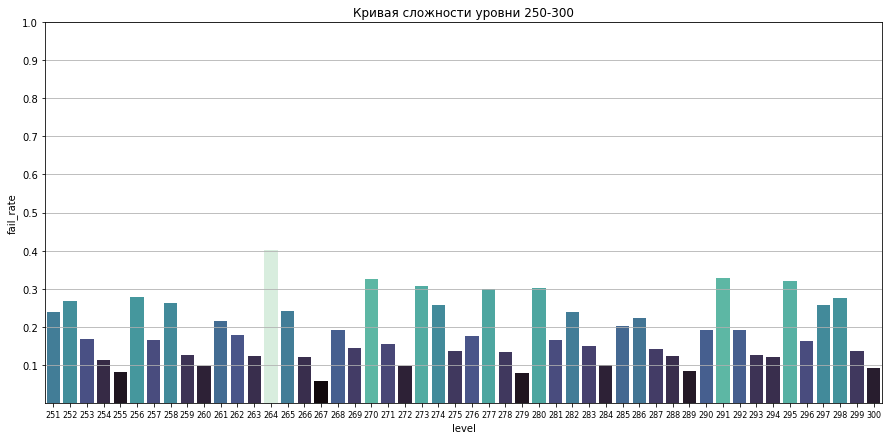

In [18]:
x = data_action[(data_action['level'] > 250) & (data_action['level'] <= 300)].level
y = data_action[(data_action['level'] > 250) & (data_action['level'] <= 300)].fail_rate
sns.barplot(x, y, palette=colors_from_values(y, "mako"))
plt.rcParams['figure.figsize']=[15,7]
plt.grid(axis='y')
plt.tick_params(axis='x', labelsize=8)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.title('Кривая сложности уровни 250-300')

Text(0.5, 1.0, 'Кривая сложности уровни 300-350')

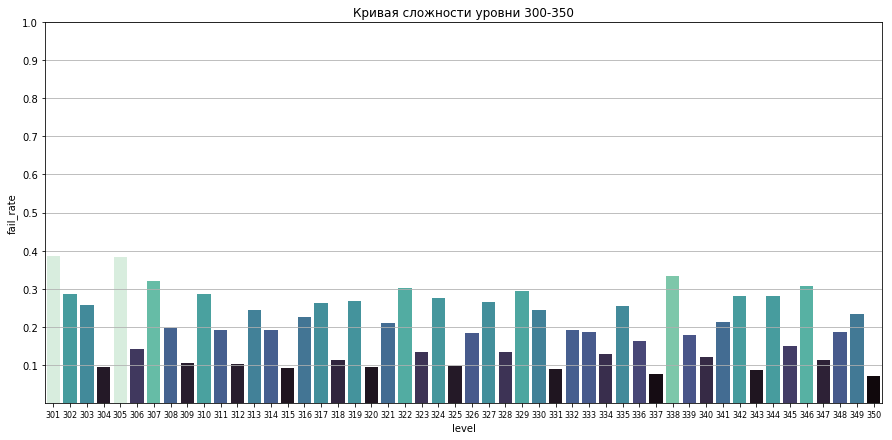

In [19]:
x = data_action[(data_action['level'] > 300) & (data_action['level'] <= 350)].level
y = data_action[(data_action['level'] > 300) & (data_action['level'] <= 350)].fail_rate
sns.barplot(x, y, palette=colors_from_values(y, "mako"))
plt.rcParams['figure.figsize']=[15,7]
plt.grid(axis='y')
plt.tick_params(axis='x', labelsize=8)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.title('Кривая сложности уровни 300-350')

Text(0.5, 1.0, 'Кривая сложности уровни 350-400')

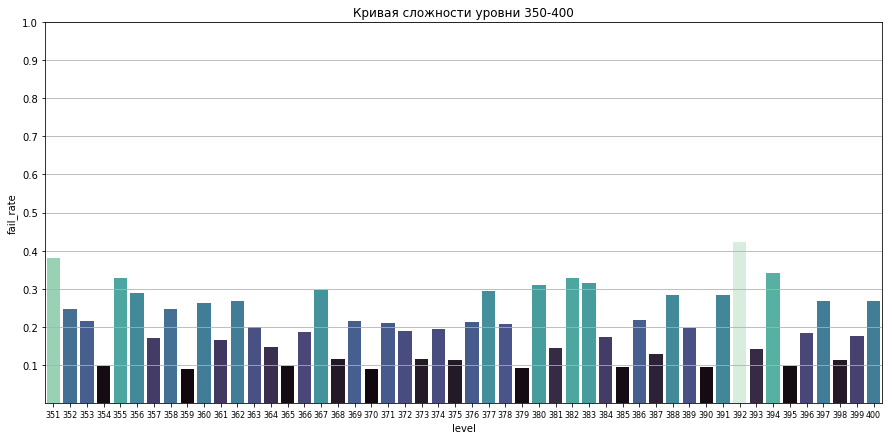

In [20]:
x = data_action[(data_action['level'] > 350) & (data_action['level'] <= 400)].level
y = data_action[(data_action['level'] > 350) & (data_action['level'] <= 400)].fail_rate
sns.barplot(x, y, palette=colors_from_values(y, "mako"))
plt.rcParams['figure.figsize']=[15,7]
plt.grid(axis='y')
plt.tick_params(axis='x', labelsize=8)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.title('Кривая сложности уровни 350-400')

Text(0.5, 1.0, 'Кривая сложности уровни 400-450')

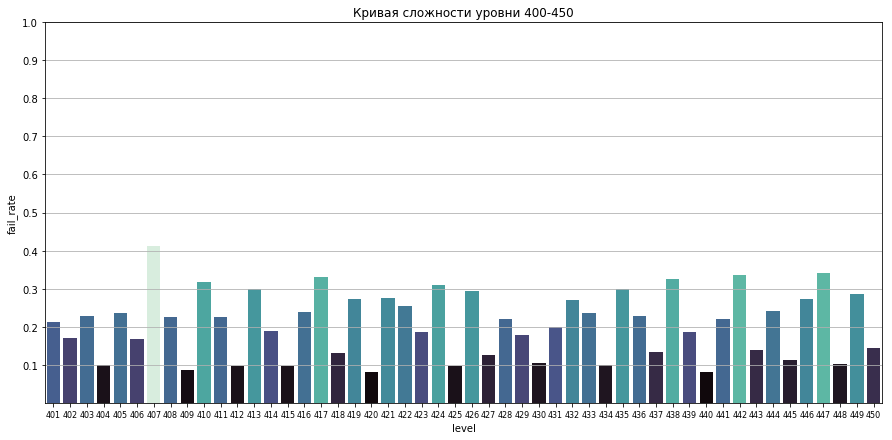

In [21]:
x = data_action[(data_action['level'] > 400) & (data_action['level'] <= 450)].level
y = data_action[(data_action['level'] > 400) & (data_action['level'] <= 450)].fail_rate
sns.barplot(x, y, palette=colors_from_values(y, "mako"))
plt.rcParams['figure.figsize']=[15,7]
plt.grid(axis='y')
plt.tick_params(axis='x', labelsize=8)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.title('Кривая сложности уровни 400-450')

Text(0.5, 1.0, 'Кривая сложности уровни 450-500')

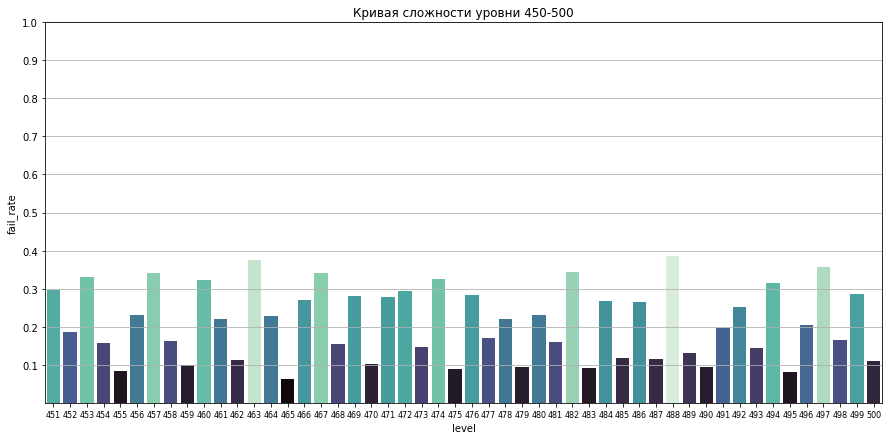

In [22]:
x = data_action[(data_action['level'] > 450) & (data_action['level'] <= 500)].level
y = data_action[(data_action['level'] > 450) & (data_action['level'] <= 500)].fail_rate
sns.barplot(x, y, palette=colors_from_values(y, "mako"))
plt.rcParams['figure.figsize']=[15,7]
plt.grid(axis='y')
plt.tick_params(axis='x', labelsize=8)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.title('Кривая сложности уровни 450-500')

Анализируя графики мы видим, что сложность до 28 уровня плавно увеличивается, дальше все уровни условно можно разделить на три категории легкие, средней сложности, сложные.Сложные уровни чередуются с легкими уровнями, уровнями средней сложности. Из графиков видно, что сложные уровни составляют 20 - 25% от всех уровней.

***Задание 3***

Рассчитать "воронку" прохождения уровней новым пользователем после установки
игры.

Для построения воронки мы посчитаем количество пользователей установивших игру, и на каждом уровне будем считать долю прошедших этот уровень от количества пользователей установивших игру.

In [24]:
#количество людей установивишх игру
count_started_users = np.unique(data[data.level == 1].uid).shape[0]
count_started_users

24162

In [25]:
#список людей установивших игру
started_users = np.unique(data[data.level == 1].uid)
started_users

array(['M001TWRFNWc5MjQ1MDI3MTAyMjE5MA', 'M001VTlGalU5MzcwMTI3MTAyMjE5Mg',
       'M010Z2VmOFgzMzgwMTI3MTAyMjE4Mg', ...,
       'enpScXF1akIwNDAzMjE3MTAyMjE4Mg', 'enpVSEdCZFUwMTUzNDE3MTAyMjE5MQ',
       'enpYTzFQQW45MzcxMzE3MTAyMjE0Mg'], dtype=object)

In [26]:
#создадим датасет только с пользователями которые установили игру, по ним будем считать воронку
data_started_users = data[data.uid.isin(started_users)]

In [27]:
#отберем только пользователей которые успешно прошли уровень
data_started_users_completed = data_started_users[data_started_users.action == 1]

In [28]:
data_funel = pd.DataFrame(data_started_users_completed.groupby('level').nunique()['uid'])
data_funel['uid_cnt'] = data_funel.uid
data_funel['level'] = data_funel.index
#посчитаем долю прошедших уровень от новых пользователей
data_funel['share_of_new_users'] = data_funel.uid_cnt/count_started_users

In [29]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    """
    Создает подписи для bar
    """
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = float(p.get_width())
                ax.text(_x, _y, '{:.3%}'.format(value), ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

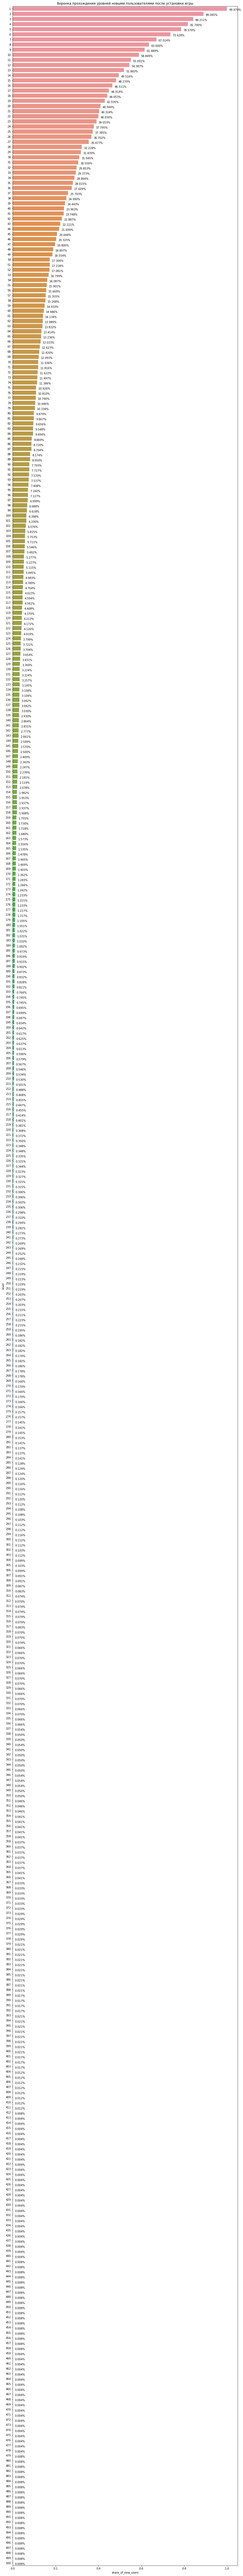

In [30]:
plt.rcParams['figure.figsize']=[15,175]
sns_t = sns.barplot(x='share_of_new_users', y='level',orient='h', data=data_funel);
plt.title('Воронка прохождения уровней новыми пользователями после установки игры')
show_values_on_bars(sns_t, "h", 0.01)

Опираясь на графики выше, мы видим, что на сложных уровнях в начале игры отток клиентов выше чем на более легких. Например на уровне 27 отток 1.3 % на 28 3.2% на 29 0.4%, на уровне 36 0.4 % на 37 1.9% на 38 0.8%, на 44 0.6% на 45 1% на 46 0.3%. 